## Another sample all put together

In [2]:
from matplotlib.gridspec import GridSpec

from jkcsoft.ml.data_utils import print_info
import keras
from keras import Input, Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from kerastuner.tuners import RandomSearch

four_sets = keras.datasets.mnist.load_data()

print_info(four_sets)

(x_train, y_train), (x_val, y_val) = four_sets

shapes (x,y, x test, ytest) => (60000, 28, 28), (60000,), (10000, 28, 28), (10000,)
 data types => uint8, uint8, uint8, uint8


In this case, "x", the independent variable, is a 32 x 32 array with a color value as in integer as data type uint8.
The logical datapoint is (x1=image x pixel index; x2=image y pixel index; x3=color value).

"y", the function output, is a label index.

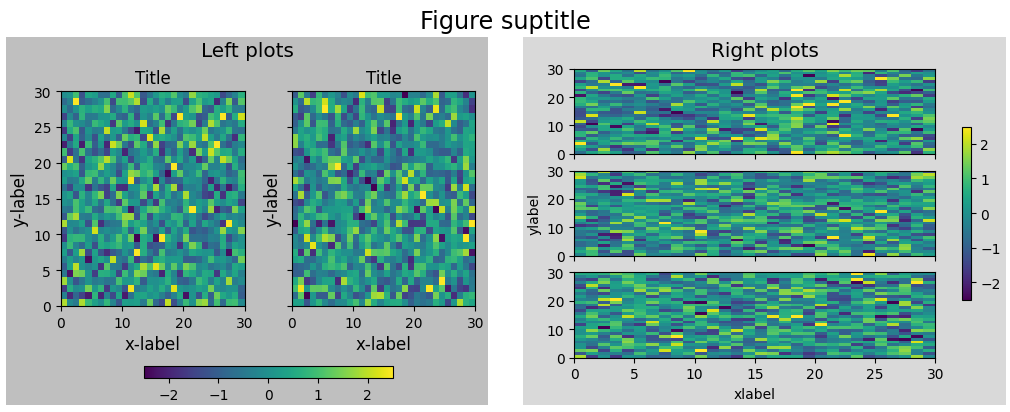

In [28]:
import matplotlib.pyplot as plt
import numpy as np


def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

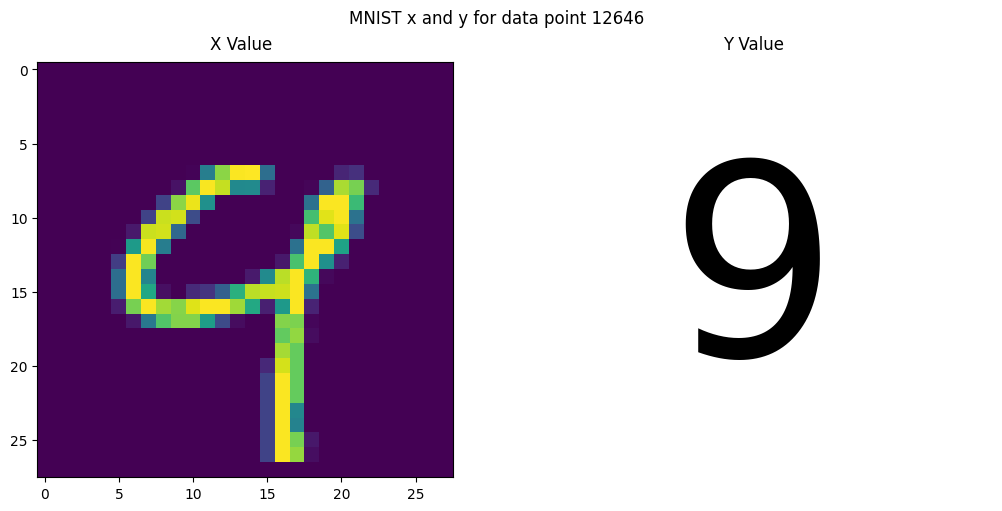

In [40]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

point = 12646

big_fig = plt.figure(figsize=(10, 5), constrained_layout=True)
big_fig.suptitle(f"MNIST x and y for data point {point}")

subfigs = big_fig.subfigures(1, 2, wspace=0.05)

fig_left = subfigs[0]
axs_left = fig_left.subplots()
#left.figure()
axs_left.imshow(x_train[point])
#left.colorbar()
axs_left.grid(False)
fig_left.suptitle('X Value')

fig_right = subfigs[1]
axs_right = fig_right.subplots()
axs_right.text(.5, .5, y_train[point], fontsize=192, ha='center', va='center')
axs_right.axis('off')
fig_right.suptitle('Y Value')

#plt.tight_layout()
plt.show()


In [1]:

# Define the model with hyperparameter choices
def build_mlp_model(hp):
    _model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        # Layer 2: Convolutional Layer
        #        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        # Layer 3: Pooling Layer
#        MaxPooling2D(pool_size=(2, 2)),
        # Layer 4: Dropout (Regularization)
#        Dropout(0.25),
        # Layer 5: Flatten Layer (to convert feature maps into a 1D vector)
        Flatten(),
        # Layer 6: Dense Layer
        Dense(128, activation='relu'),
        Dropout(0.5),
        # Output Layer (10 classes for 0–9 digits)
        Dense(10, activation='softmax')
    ])
    _model.compile(
        optimizer="adam",
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return _model

model = build_mlp_model(None)

model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

# Set up the tuner
tuner = RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='my_dir',
    project_name='mnist_tuning',
#    overwrite=True
)

def tune_mnist():
    # ***EXPENSIVE***: Fit the tuner
    # tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val), verbose=1)

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"Best hyperparameters from the tuning: {best_hps}")

    # Train the best model
    best_model = tuner.hypermodel.build(best_hps)

    best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))



/var/folders/xc/32y9xdg50zv0b_kvssbpfc_00000gn/T/ipykernel_25520/1822995890.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


shapes (x,y, x test, ytest) => (60000, 28, 28), (60000,), (10000, 28, 28), (10000,)
 data types => uint8, uint8, uint8, uint8


KeyboardInterrupt: 